# Customer Segmentation

In this Project, I have done Customer segmentation. data is taken from kaggle. name of dataset is ["Customer Personality Analysis"](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis).

### Data Description

> <b>ID </b>: Customer's unique identifier <br>
<b>Year_Birth</b> : Customer's birth year <br>
<b>Education</b> : Customer's education level <br>
<b>Marital_Status</b> : Customer's marital status  <br>
<b>Income</b> : Customer's yearly household income <br>
<b>Kidhome</b> : Number of children in customer's household <br>
<b>Teenhome </b>: Number of teenagers in customer's household <br>
<b>Dt_Customer </b>: Date of customer's enrollment with the company <br>
<b>Recency</b> : Number of days since customer's last purchase <br>
<b>Complain </b>: 1 if the customer complained in the last 2 years, 0 otherwise <br>

<b>Products </b> <br>
><b>MntWines </b> : Amount spent on wine in last 2 years <br>
<b>MntFruits </b> : Amount spent on fruits in last 2 years <br>
<b>MntMeatProducts </b> : Amount spent on meat in last 2 years <br>
<b>MntFishProducts </b> : Amount spent on fish in last 2 years <br>
<b>MntSweetProducts </b> : Amount spent on sweets in last 2 years <br>
<b>MntGoldProds </b> : Amount spent on gold in last 2 years <br>

<b>Promotion</b> <br>
><b>NumDealsPurchases</b> : Number of purchases made with a discount <br>
<b>AcceptedCmp1</b> : 1 if customer accepted the offer in the 1st campaign, 0 otherwise <br>
<b>AcceptedCmp2</b> : 1 if customer accepted the offer in the 2nd campaign, 0 otherwise <br>
<b>AcceptedCmp3</b> : 1 if customer accepted the offer in the 3rd campaign, 0 otherwise <br>
<b>AcceptedCmp4</b> : 1 if customer accepted the offer in the 4th campaign, 0 otherwise <br>
<b>AcceptedCmp5</b> : 1 if customer accepted the offer in the 5th campaign, 0 otherwise <br>
<b>Response</b> : 1 if customer accepted the offer in the last campaign, 0 otherwise <br>

<b>Place</b> <br>
><b>NumWebPurchases</b> : Number of purchases made through the company’s website <br>
<b>NumCatalogPurchases</b> : Number of purchases made using a catalogue <br>
<b>NumStorePurchases</b> : Number of purchases made directly in stores <br>
<b>NumWebVisitsMonth</b> : Number of visits to company’s website in the last month <br>

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mycolorpy import colorlist as colist

### Load Data

In [3]:
data = pd.read_csv("F:\Project\customer data science\data.csv")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


### Check for Duplicate

In [4]:
print(data['ID'].nunique() == 2240) # i.e same as total record so we don't need to keep it.
data.drop(columns=['ID'], inplace=True)

True


In [5]:
## columns name
cols= data.columns
cols

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
## info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [7]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [8]:
data.nunique().sort_values(ascending=False)

Income                 1974
MntWines                776
Dt_Customer             663
MntMeatProducts         558
MntGoldProds            213
MntFishProducts         182
MntSweetProducts        177
MntFruits               158
Recency                 100
Year_Birth               59
NumWebVisitsMonth        16
NumWebPurchases          15
NumDealsPurchases        15
NumCatalogPurchases      14
NumStorePurchases        14
Marital_Status            8
Education                 5
Teenhome                  3
Kidhome                   3
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
Z_CostContact             1
Z_Revenue                 1
dtype: int64

In [9]:
## delete columns thats not giving any info i.e Feature contain only one value.
data.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)
datac = data.copy()

delete constant features.

In [10]:
cust_cols, product_cols, place_cols, promotion_cols = [], [], [], []

for col in data.columns:
    if col.startswith('Mnt'):
        product_cols.append(col)
    
    elif col.startswith('Accepted') or col in ['NumDealsPurchases', 'Response']:
        promotion_cols.append(col)
    
    elif col.startswith('Num'):
        place_cols.append(col)
    
    else:
        cust_cols.append(col)

### Describe Data

In [11]:
data.describe().style.background_gradient(cmap='coolwarm')

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking for Missing Values

In [12]:
data.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

<AxesSubplot:xlabel='Income'>

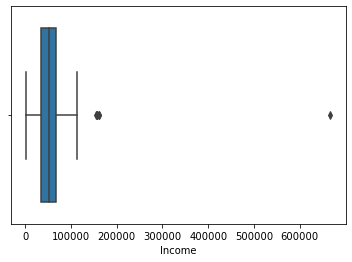

In [13]:
sns.boxplot(x=data['Income'])

Fill with median because it contain outliers.

In [14]:
data['Income'] = data['Income'].fillna(data['Income'].median())

### Dealing Outliers

In [15]:
data = data[data['Year_Birth']>=1940]

In [16]:
from scipy import stats
data = data[(np.abs(stats.zscore(data['Income'])) < 3)]

### Generating new Features for Analysis

In [17]:
df = data.copy()
df['No. times promo. accepted'] = df[promotion_cols[1:-1]].sum(axis=1)

In [18]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Days of Joining'] = df['Dt_Customer'] - df['Dt_Customer'].min()

In [19]:
# approx. Age at 2022
df['Year_Birth'] = 2022 - df['Year_Birth']

### Check for Correlation

<AxesSubplot:>

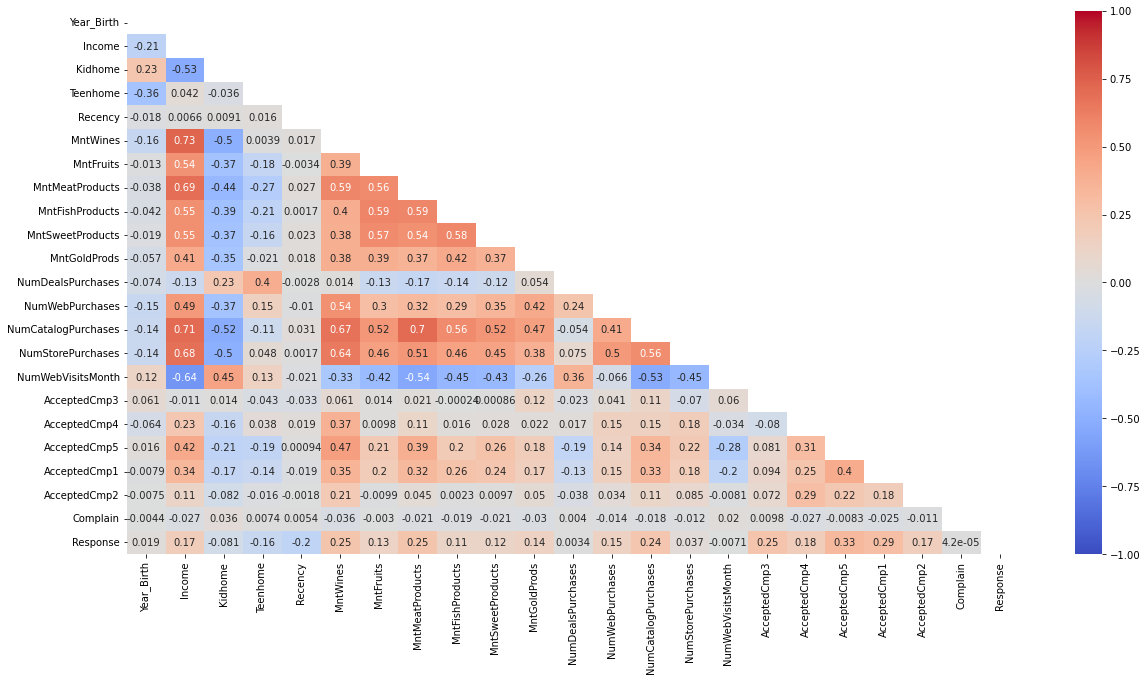

In [20]:
corr = data.corr()
plt.figure(figsize=(20,10))
mask=np.triu(np.ones_like(corr)).astype('bool')
sns.heatmap(corr, annot=corr, mask=mask, vmin=-1, vmax=1, cmap='coolwarm')

📌
> 'MntMeatProduct' is highly corrlated with 'NumCatalogPurchase' <br>
'Income' is negatively correlated with 'NumWebVisitMonth' <br>
'NumCatelogPurchases' is negatively correlated with 'NumWebVisitMonth' <br>
'MntWines' is highly corrlated with 'NumStorePurchases', 'NumCatelogPurchases', 'Income' <br>


### Check for Categorical Features

In [21]:
cat_cols = list(df.select_dtypes(include='object').columns)

### Unique values counts of Categorical Features

In [22]:
pd.DataFrame(df[cat_cols].nunique(), columns=['Unique Values'])

,Unique Values
Education,5
Marital_Status,8


In [23]:
print('* Categorical Features Unique Values : \n')
for col in cat_cols:
    print('\t **', col, ' : ', df[col].unique())

* Categorical Features Unique Values : 

	 ** Education  :  ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
	 ** Marital_Status  :  ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


### Frequency value counts of Categorical Features

Text(0.5, 0.98, 'Frequency Counts of Categorical Features')

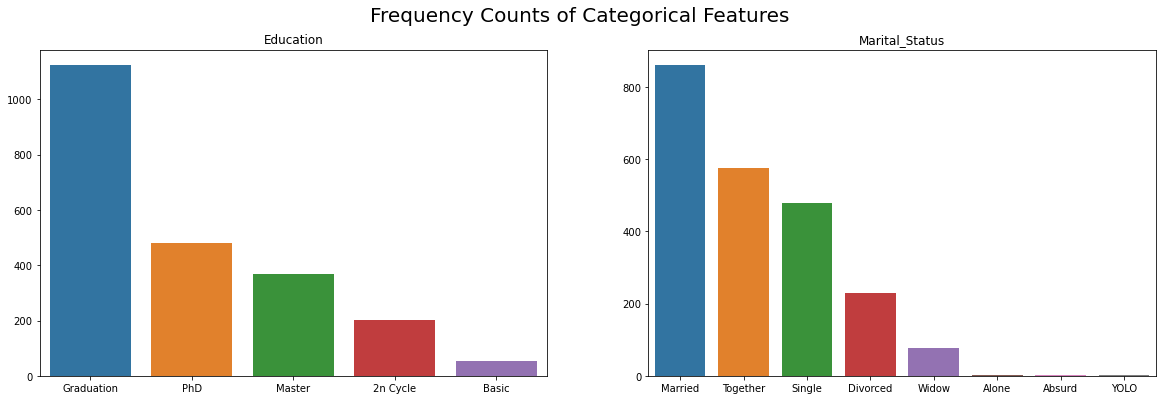

In [24]:
freq = data['Education'].value_counts()
fig, axs = plt.subplots(1, 2, figsize=(20,6))
sns.barplot(x=freq.index, y=freq.values, ax=axs[0])
axs[0].set_title('Education')

freq = data['Marital_Status'].value_counts()
sns.barplot(x=freq.index, y=freq.values, ax=axs[1])
axs[1].set_title('Marital_Status')

plt.suptitle('Frequency Counts of Categorical Features', fontsize=20)

### Marital_Status and Education Analysis

<AxesSubplot:xlabel='Marital_Status'>

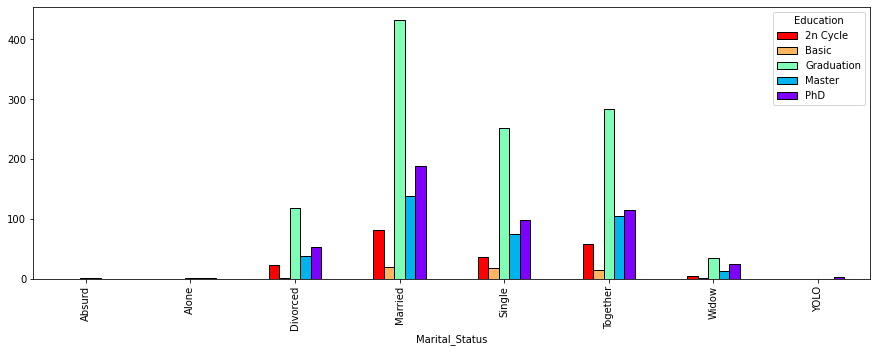

In [25]:
df.groupby(['Marital_Status', 'Education']).size().unstack().fillna(0).plot(kind='bar', figsize=(15,5), edgecolor='black', color=colist.gen_color(cmap='rainbow_r', n=5))

📌
> most of 'Married' are Graduated.
 

### Check for Numeric Feature

In [26]:
s= df.dtypes
num_cols = list(s.loc[s!='object'].index)
for col in ['Dt_Customer',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2']:
    num_cols.remove(col)

### Distribution of Numeric Features

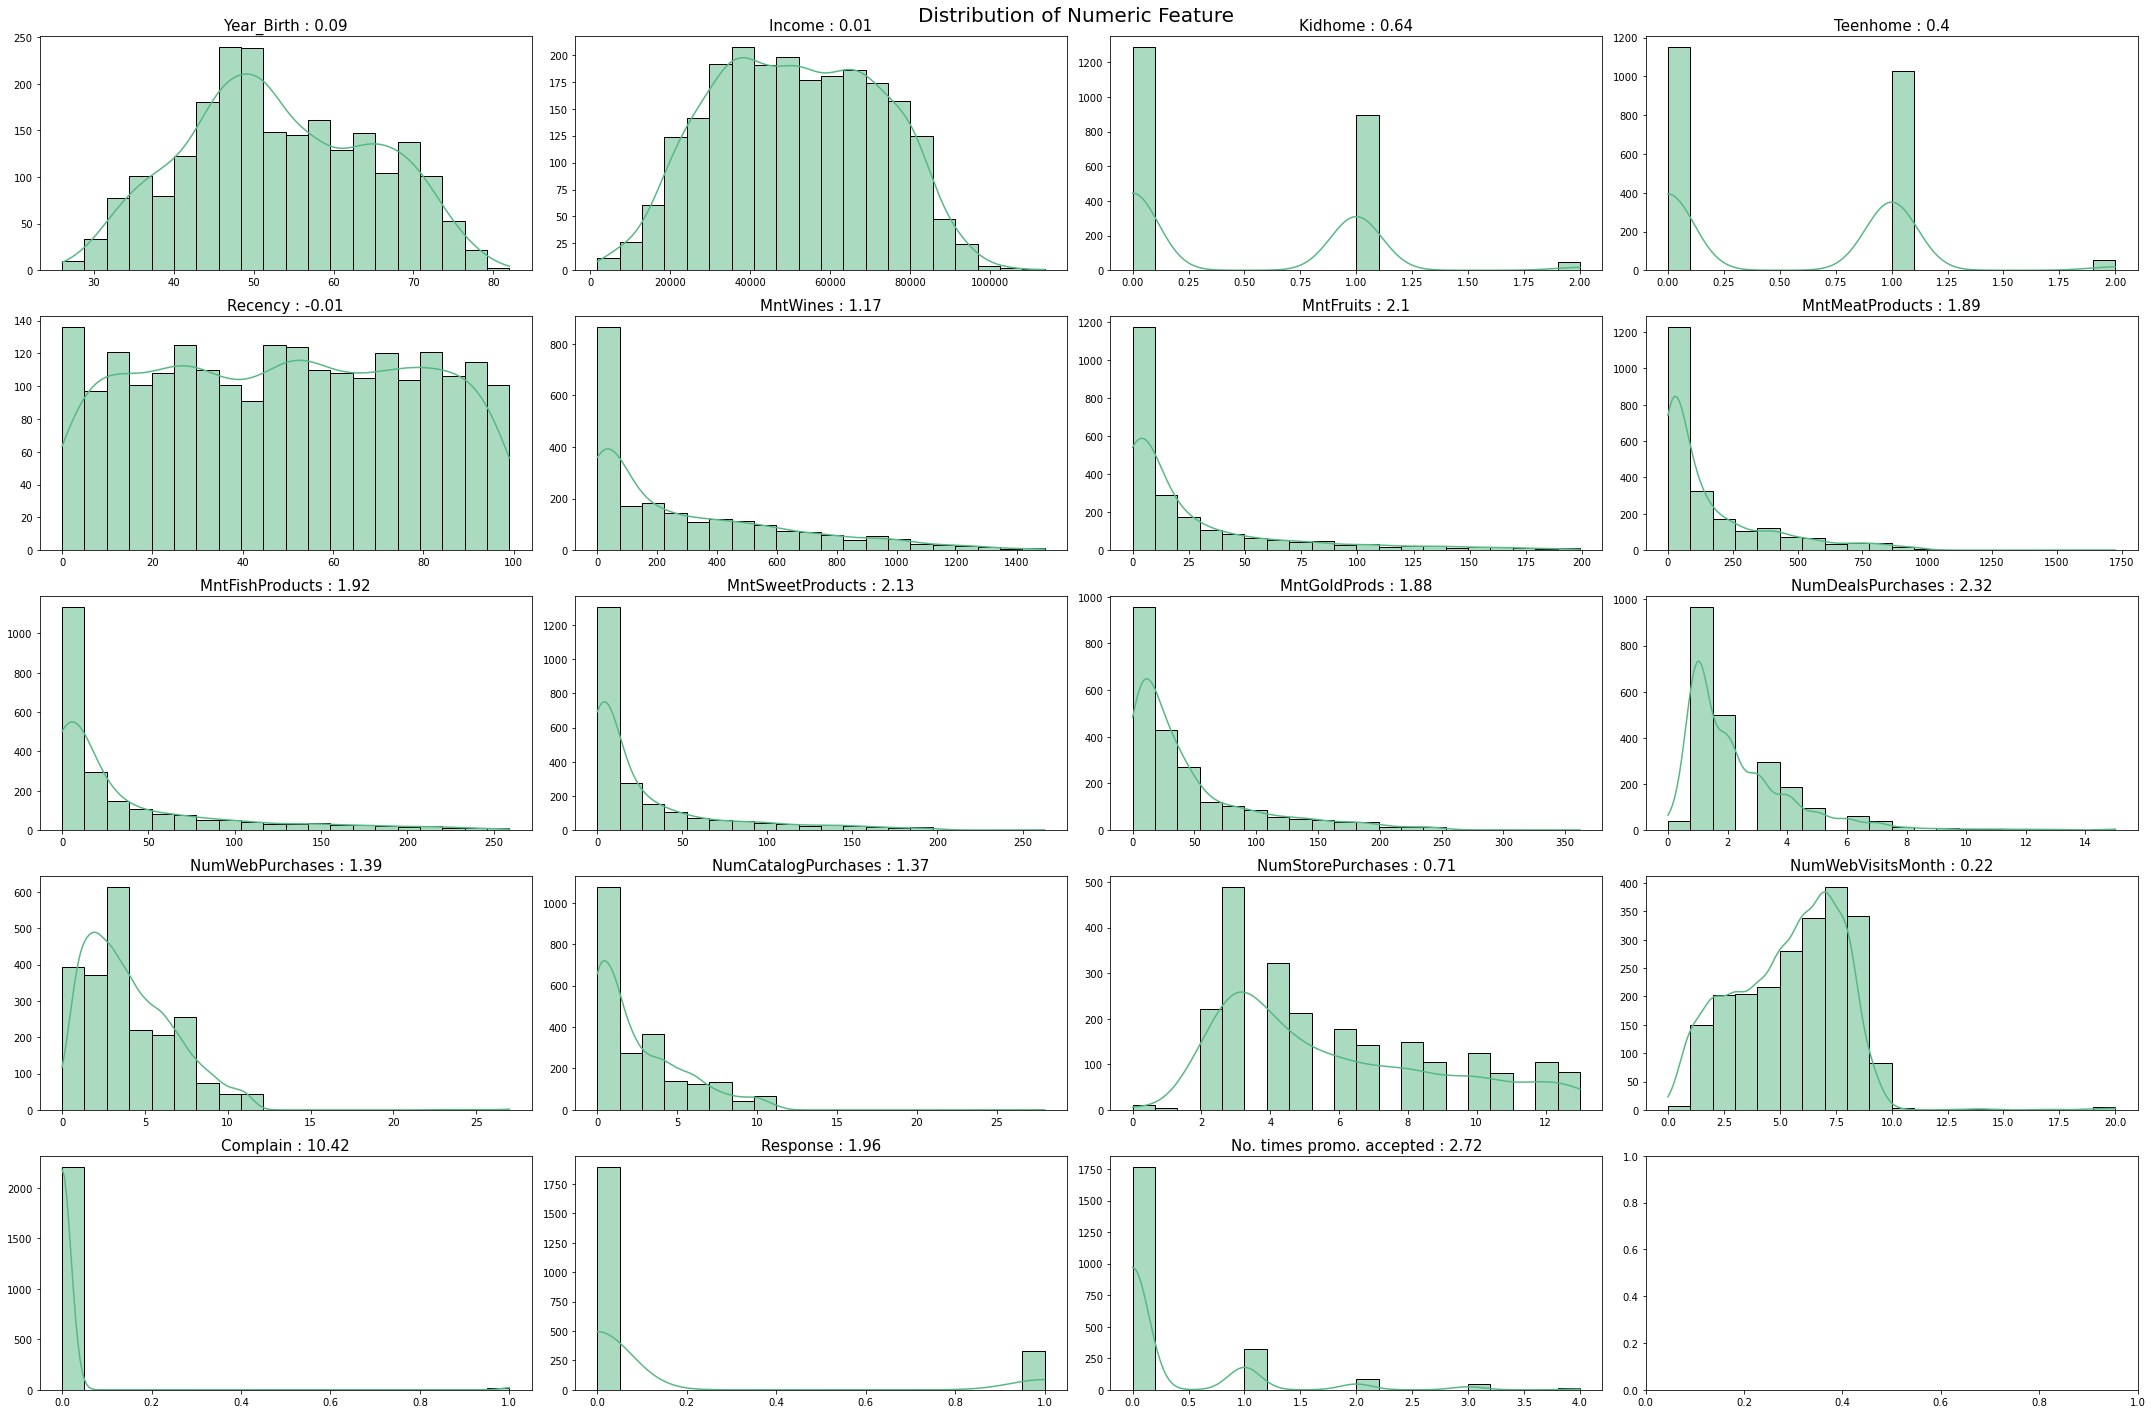

In [27]:
_, axs = plt.subplots(5, 4, figsize=(30, 20))
for i, col in enumerate(num_cols[:-1]):
    skew = df[col].skew().round(2)
    sns.histplot(df[col], bins=20, kde=True, ax= axs[i//4, i % 4], color='#57b884')
    axs[i//4, i % 4].set_ylabel('')
    axs[i//4, i % 4].set_xlabel('')
    axs[i//4, i % 4].set_title(col + ' : '+ str(skew), fontsize=15)
plt.suptitle('Distribution of Numeric Feature', fontsize=20)
plt.tight_layout()

📌
> Most of Numeric data is right skewed.

### Frequency value counts of Discrete Numeric Features

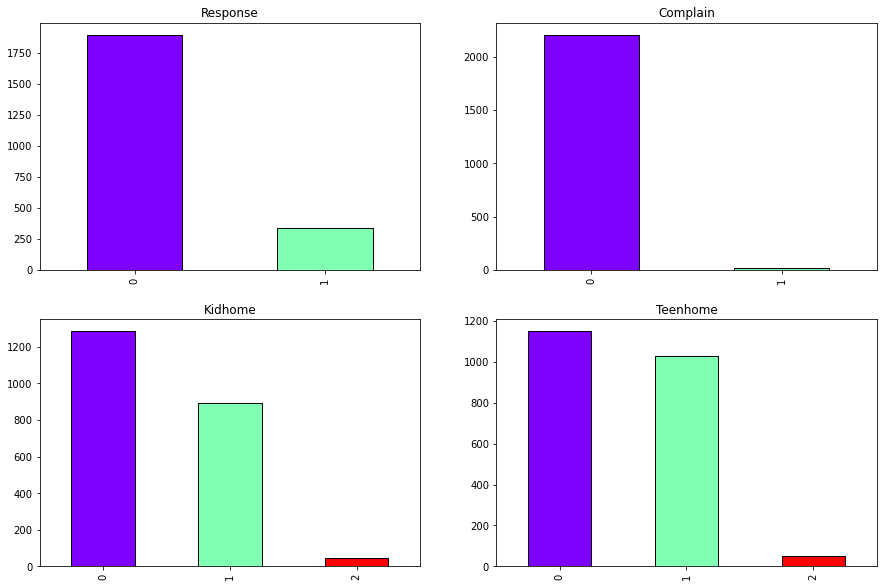

In [28]:
_,axs = plt.subplots(2, 2, figsize=(15,10))
for i, col in enumerate(['Response', 'Complain', 'Kidhome', 'Teenhome']):
    ax=axs[i//2, i%2]
    df[col].value_counts().plot(kind='bar', edgecolor='black', ax=ax, color=colist.gen_color('rainbow', n=3))
    ax.set_title(col)
plt.show()

### Categorical to Numeric Analysis

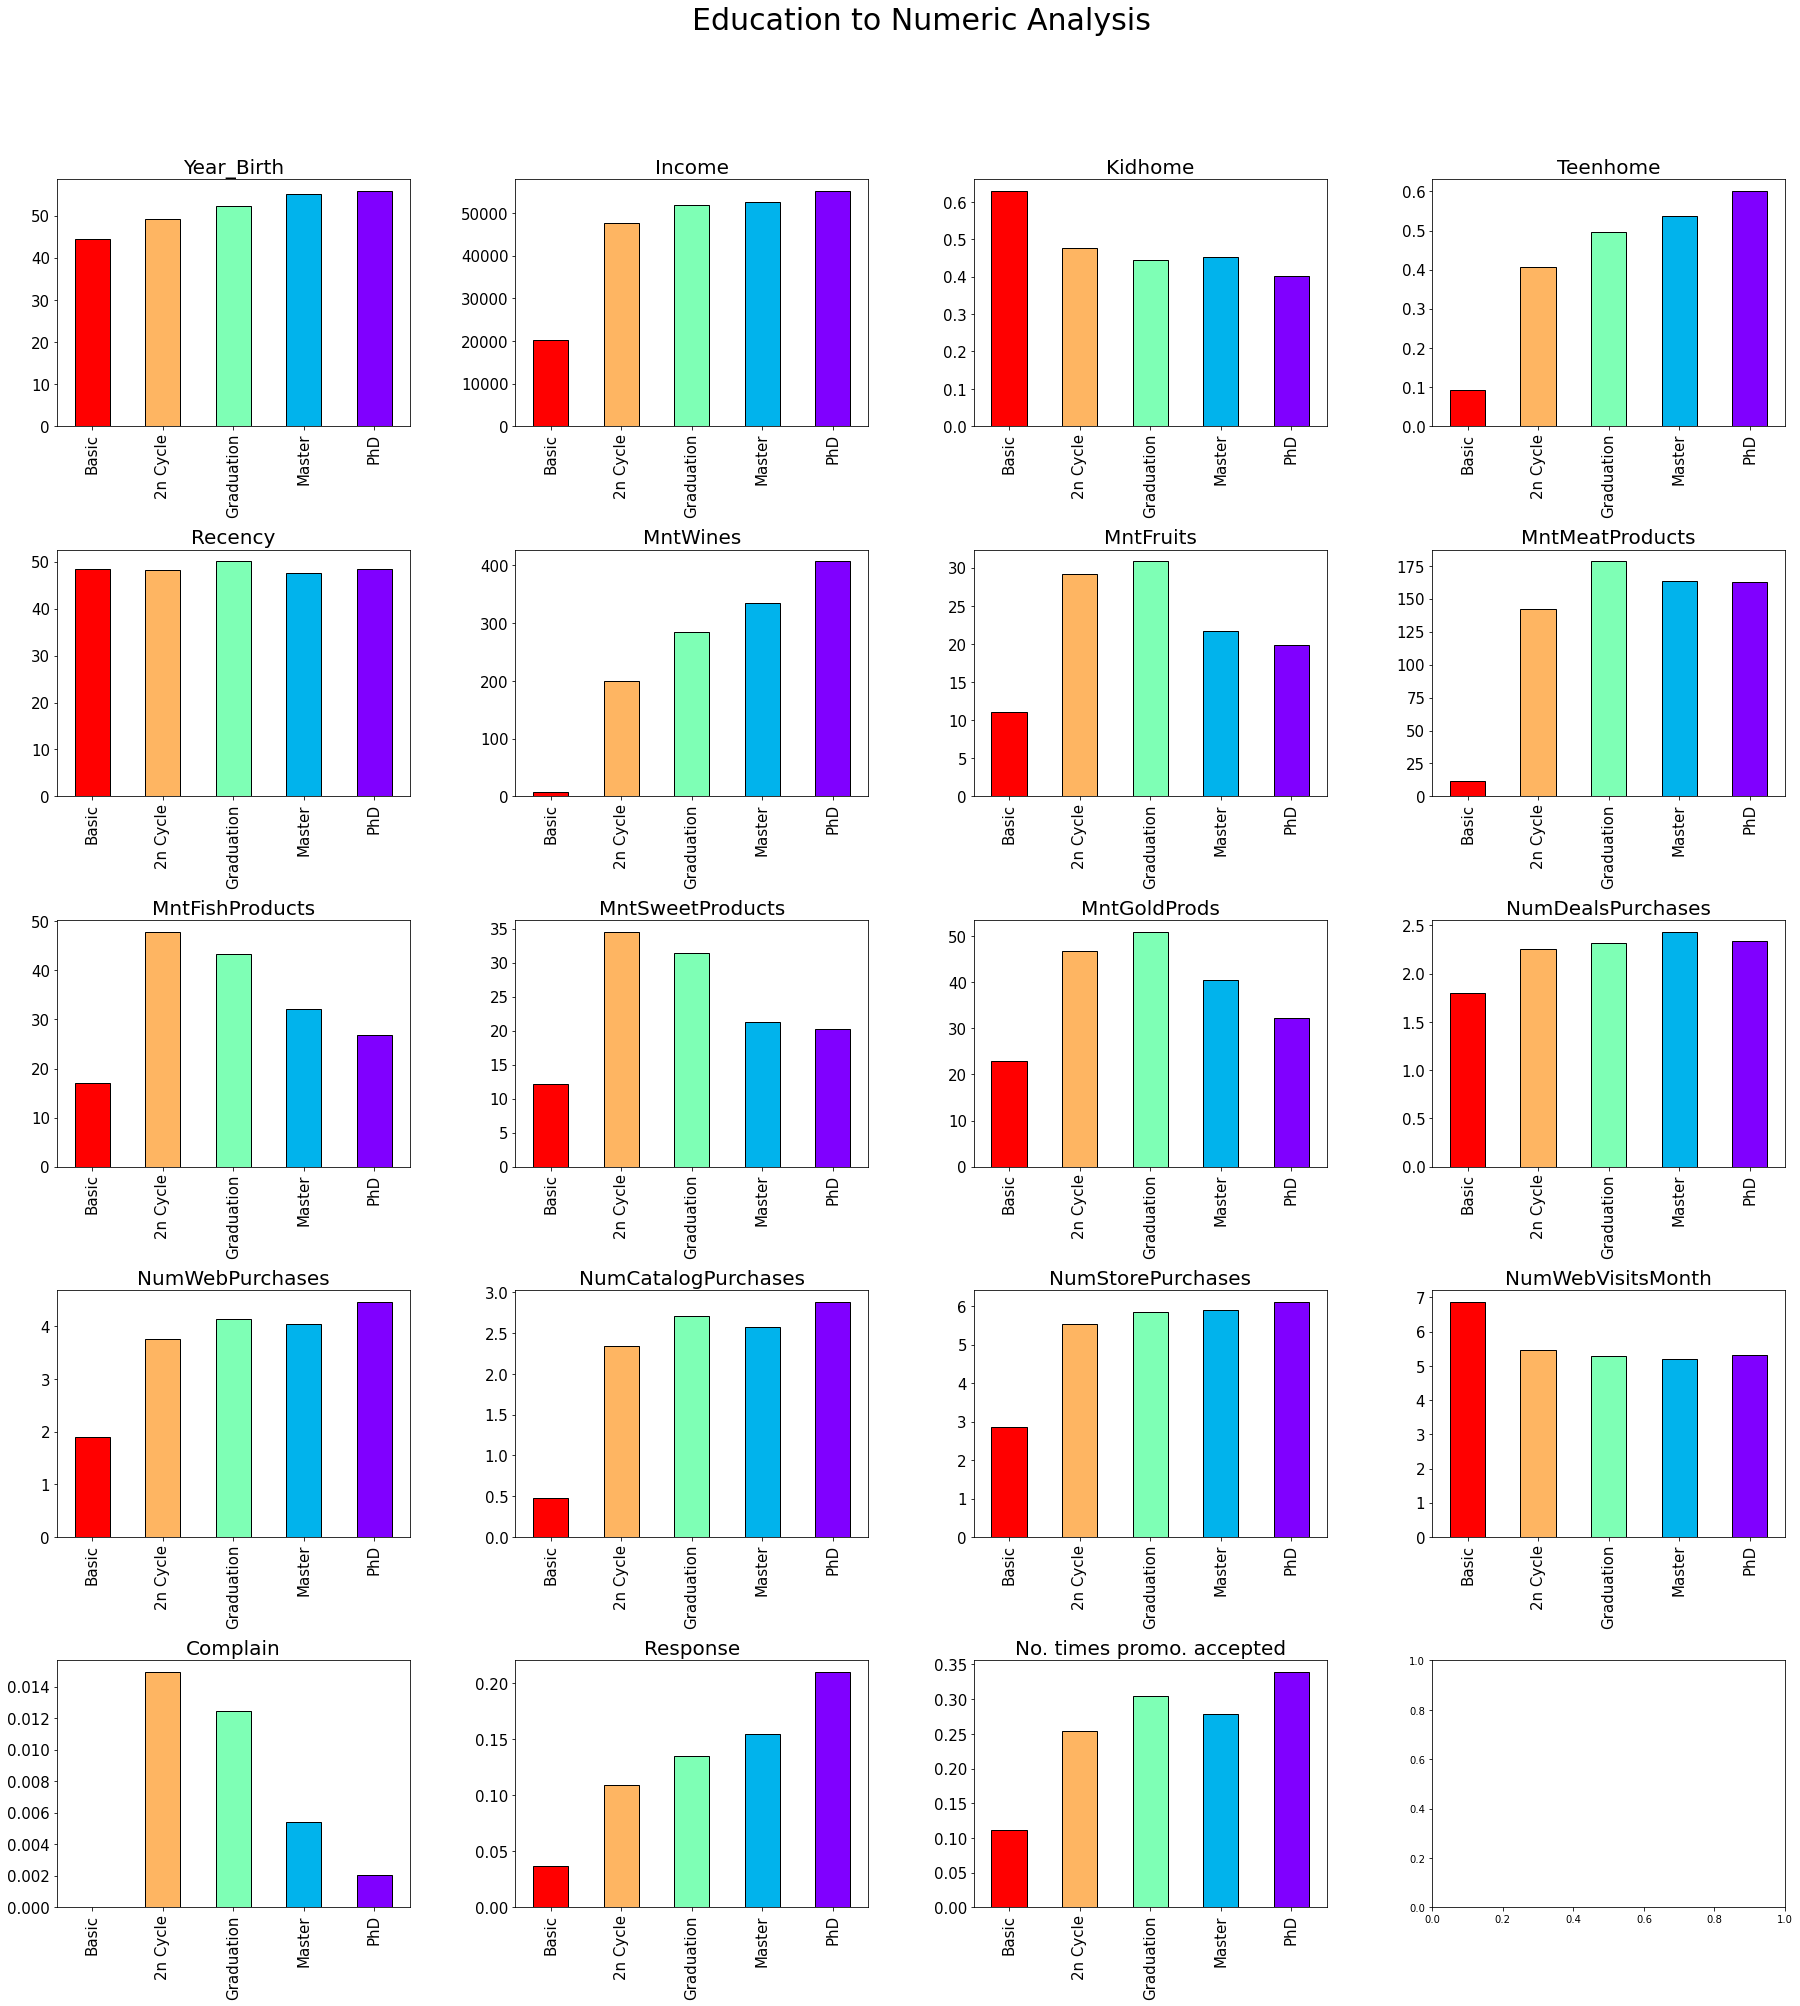

In [29]:
mean_cat_num = df.groupby('Education')[num_cols].mean().loc[['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']]
_, axs = plt.subplots(5, 4, figsize=(30, 30), gridspec_kw=dict(left=0.1, right=0.9,
                                        bottom=0.1, top=0.9, wspace=0.3))
for i, col in enumerate(mean_cat_num.columns):
    ax= axs[i//4, i%4]
    mean_cat_num[col].plot(kind='bar', color=colist.gen_color(cmap='rainbow_r', n=5), ax=ax,edgecolor='black')
    ax.set_title(col, fontdict={'fontsize':20})
    ax.set_xlabel(None)
    ax.tick_params(axis='both', which='major', labelsize=15)
    

plt.subplots_adjust(hspace=0.5)
plt.suptitle('Education to Numeric Analysis', fontsize=30)
plt.show()  

📌
> person with phd buy wines more than other, have most teen and accept promotions and have highest salary.<br>
person with basic education buy fish, wine least, prefer store as mode of purchase visit web most, have most kidhome and least salary.<br>
person with 2n cycle education complain most. <br> 


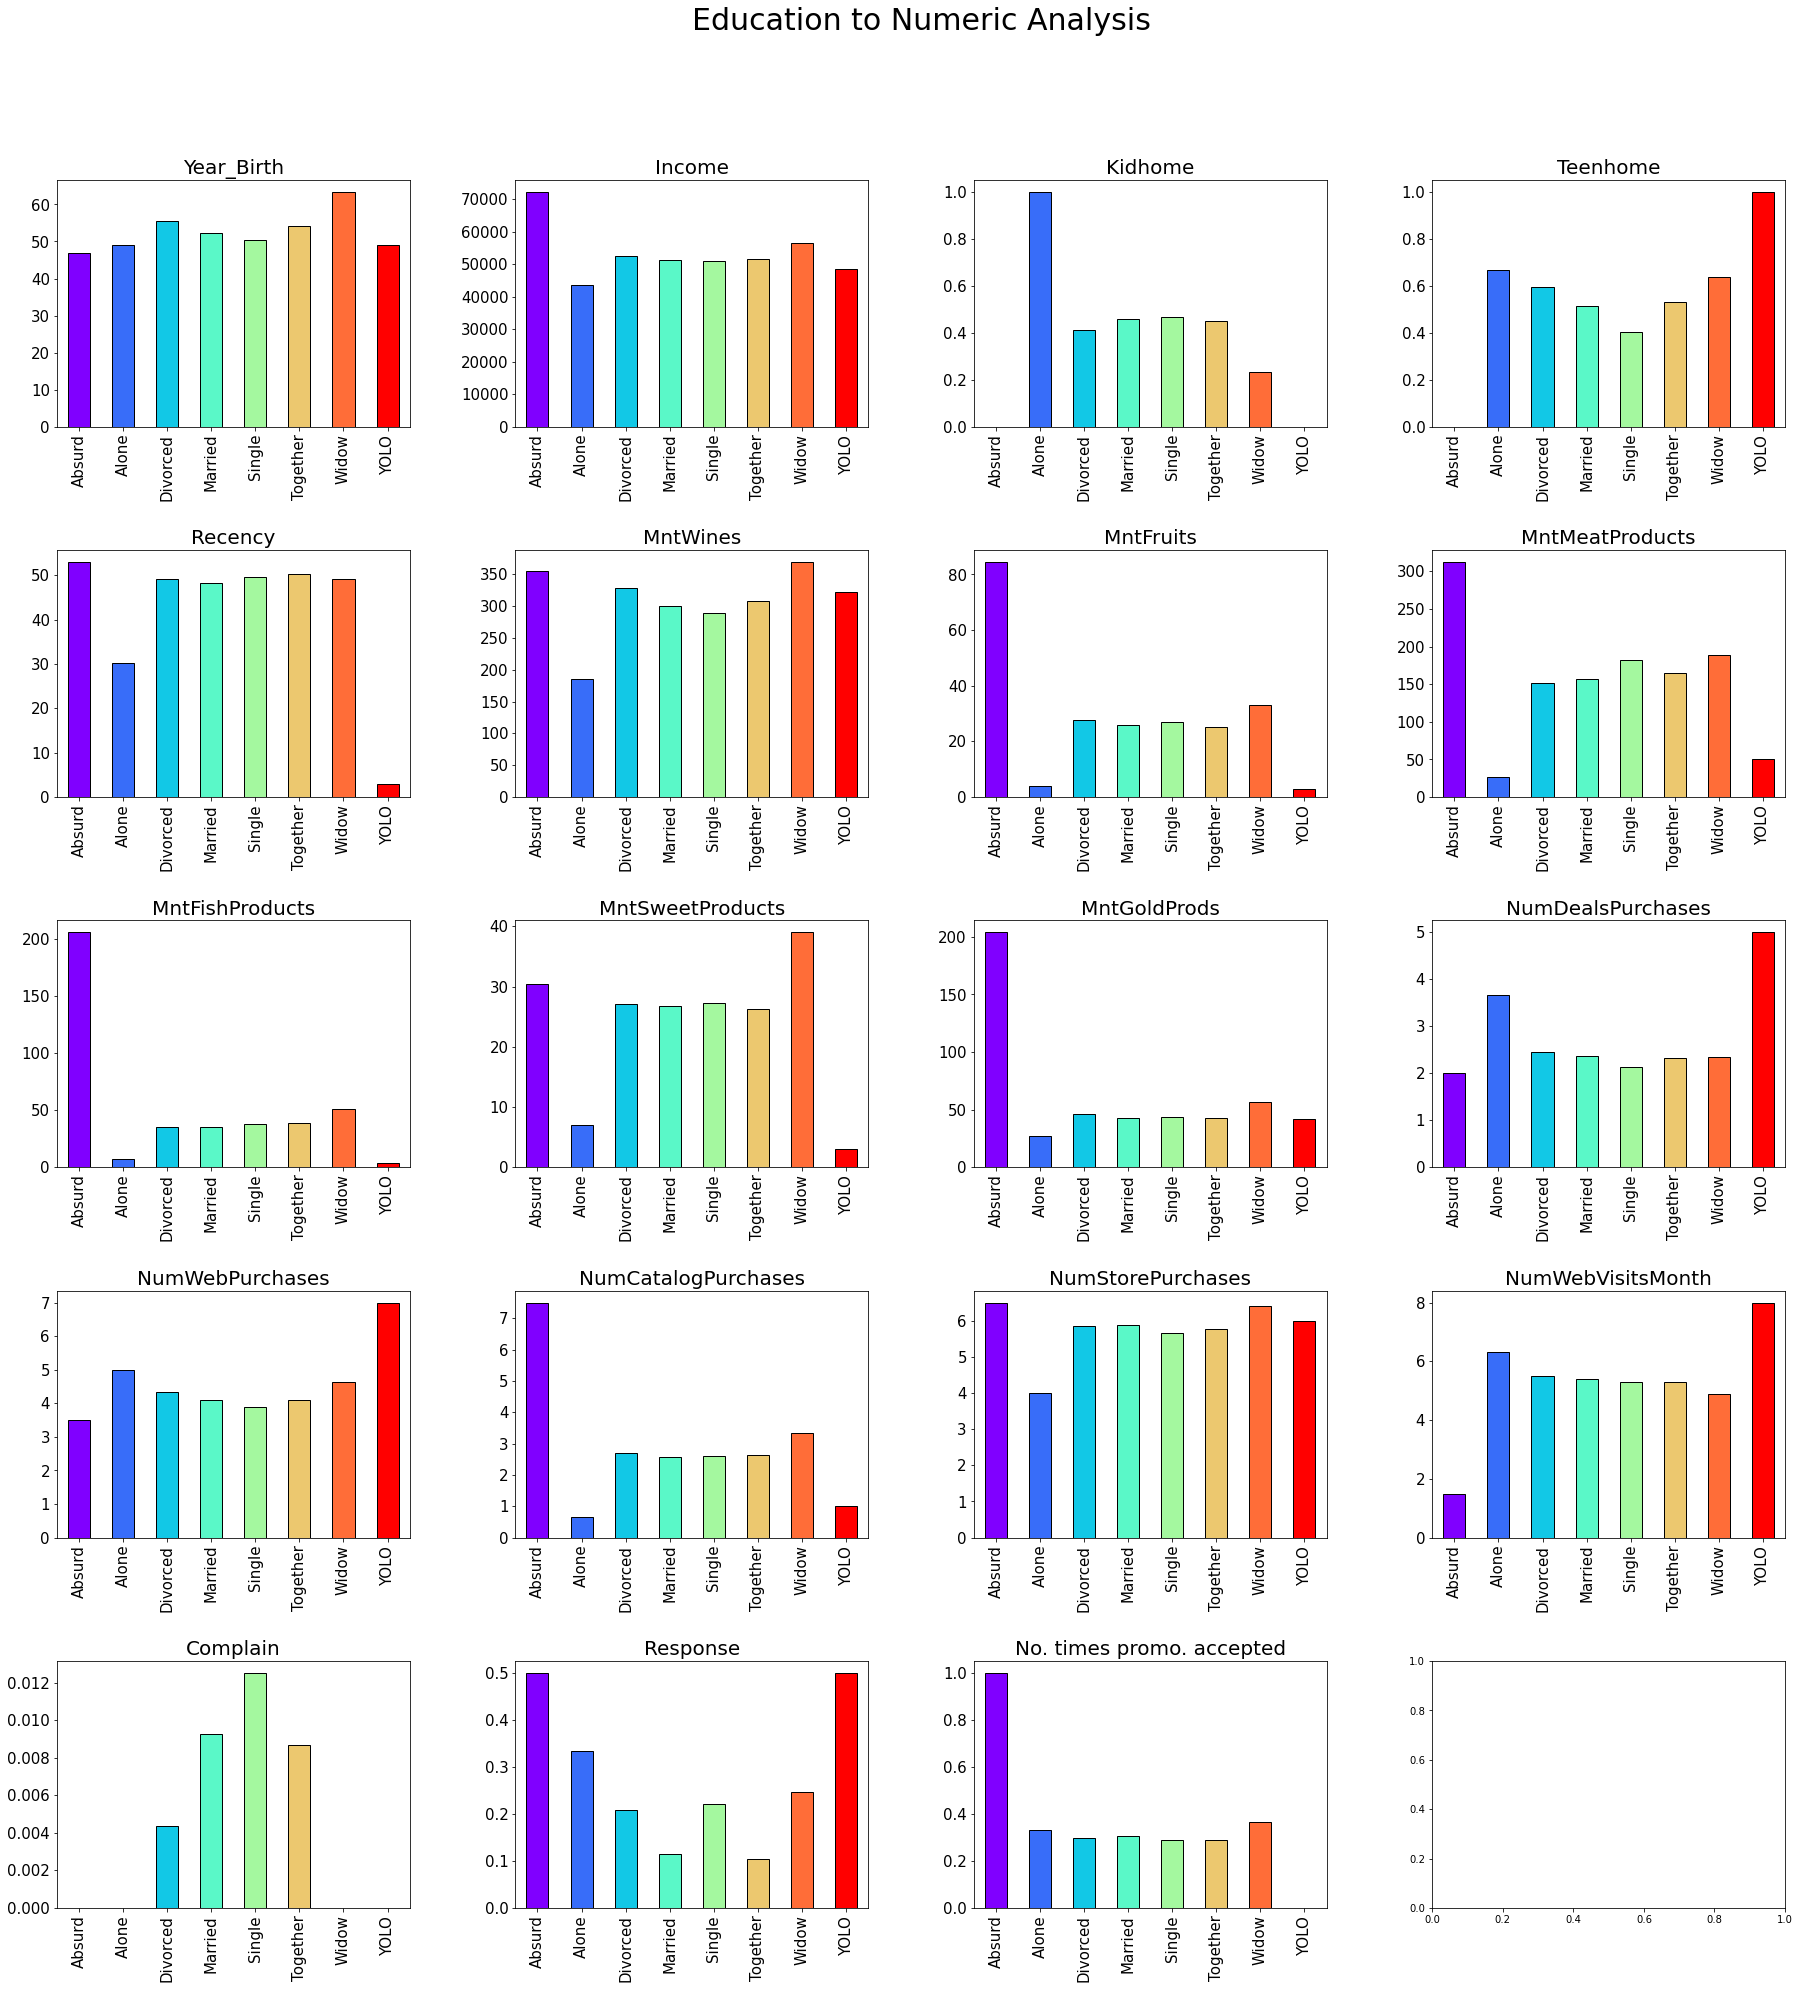

In [30]:
mean_cat_num = df.groupby('Marital_Status')[num_cols].mean().loc[['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow','YOLO']]
_, axs = plt.subplots(5, 4, figsize=(30, 30), gridspec_kw=dict(left=0.1, right=0.9,
                                        bottom=0.1, top=0.9, wspace=0.3))
for i, col in enumerate(mean_cat_num.columns):
    ax= axs[i//4, i%4]
    mean_cat_num[col].plot(kind='bar', edgecolor='black', color=colist.gen_color(cmap='rainbow', n=8), ax=ax)
    ax.set_title(col, fontdict={'fontsize':20})
    ax.set_xlabel(None)
    ax.tick_params(axis='both', which='major', labelsize=15)
    

plt.subplots_adjust(hspace=0.5)
plt.suptitle('Education to Numeric Analysis', fontsize=30)
plt.show()  

📌
> Absurd person have most salary, not have kids, prefer catalog purchase, not visit web frequently, accept promotions, buy fruits, fish, gold and meat most than others. \
>Alone person have highest kid, buy least meat and gold, not prefer catalog purchase. \
>YOLO person web purchase, not accept promotion, buy least sweet and meat and  have max teen at home and low recency.


In [31]:
import scipy.stats as stats

In [32]:
plt.figure(figsize=(10,10))

def plot_chi_test(col1, col2, ax):
    cont = pd.crosstab(df[col1],df[col2], 
             normalize=False)
    
    cont.plot.bar(stacked=True, ax=ax, edgecolor= 'black', color=colist.gen_color(cmap='rainbow_r', n=6))
    chi2, p, dof, ex = stats.chi2_contingency(cont)
    return p, eval_p(p)

def eval_p(p):
    alpha = 0.05
    if p <= alpha:
        return 'Dependent'
    else:
        return 'Independent'

<Figure size 720x720 with 0 Axes>

Text(0.5, 0.98, 'Chie - 2 test of Discrete Numeric columns')

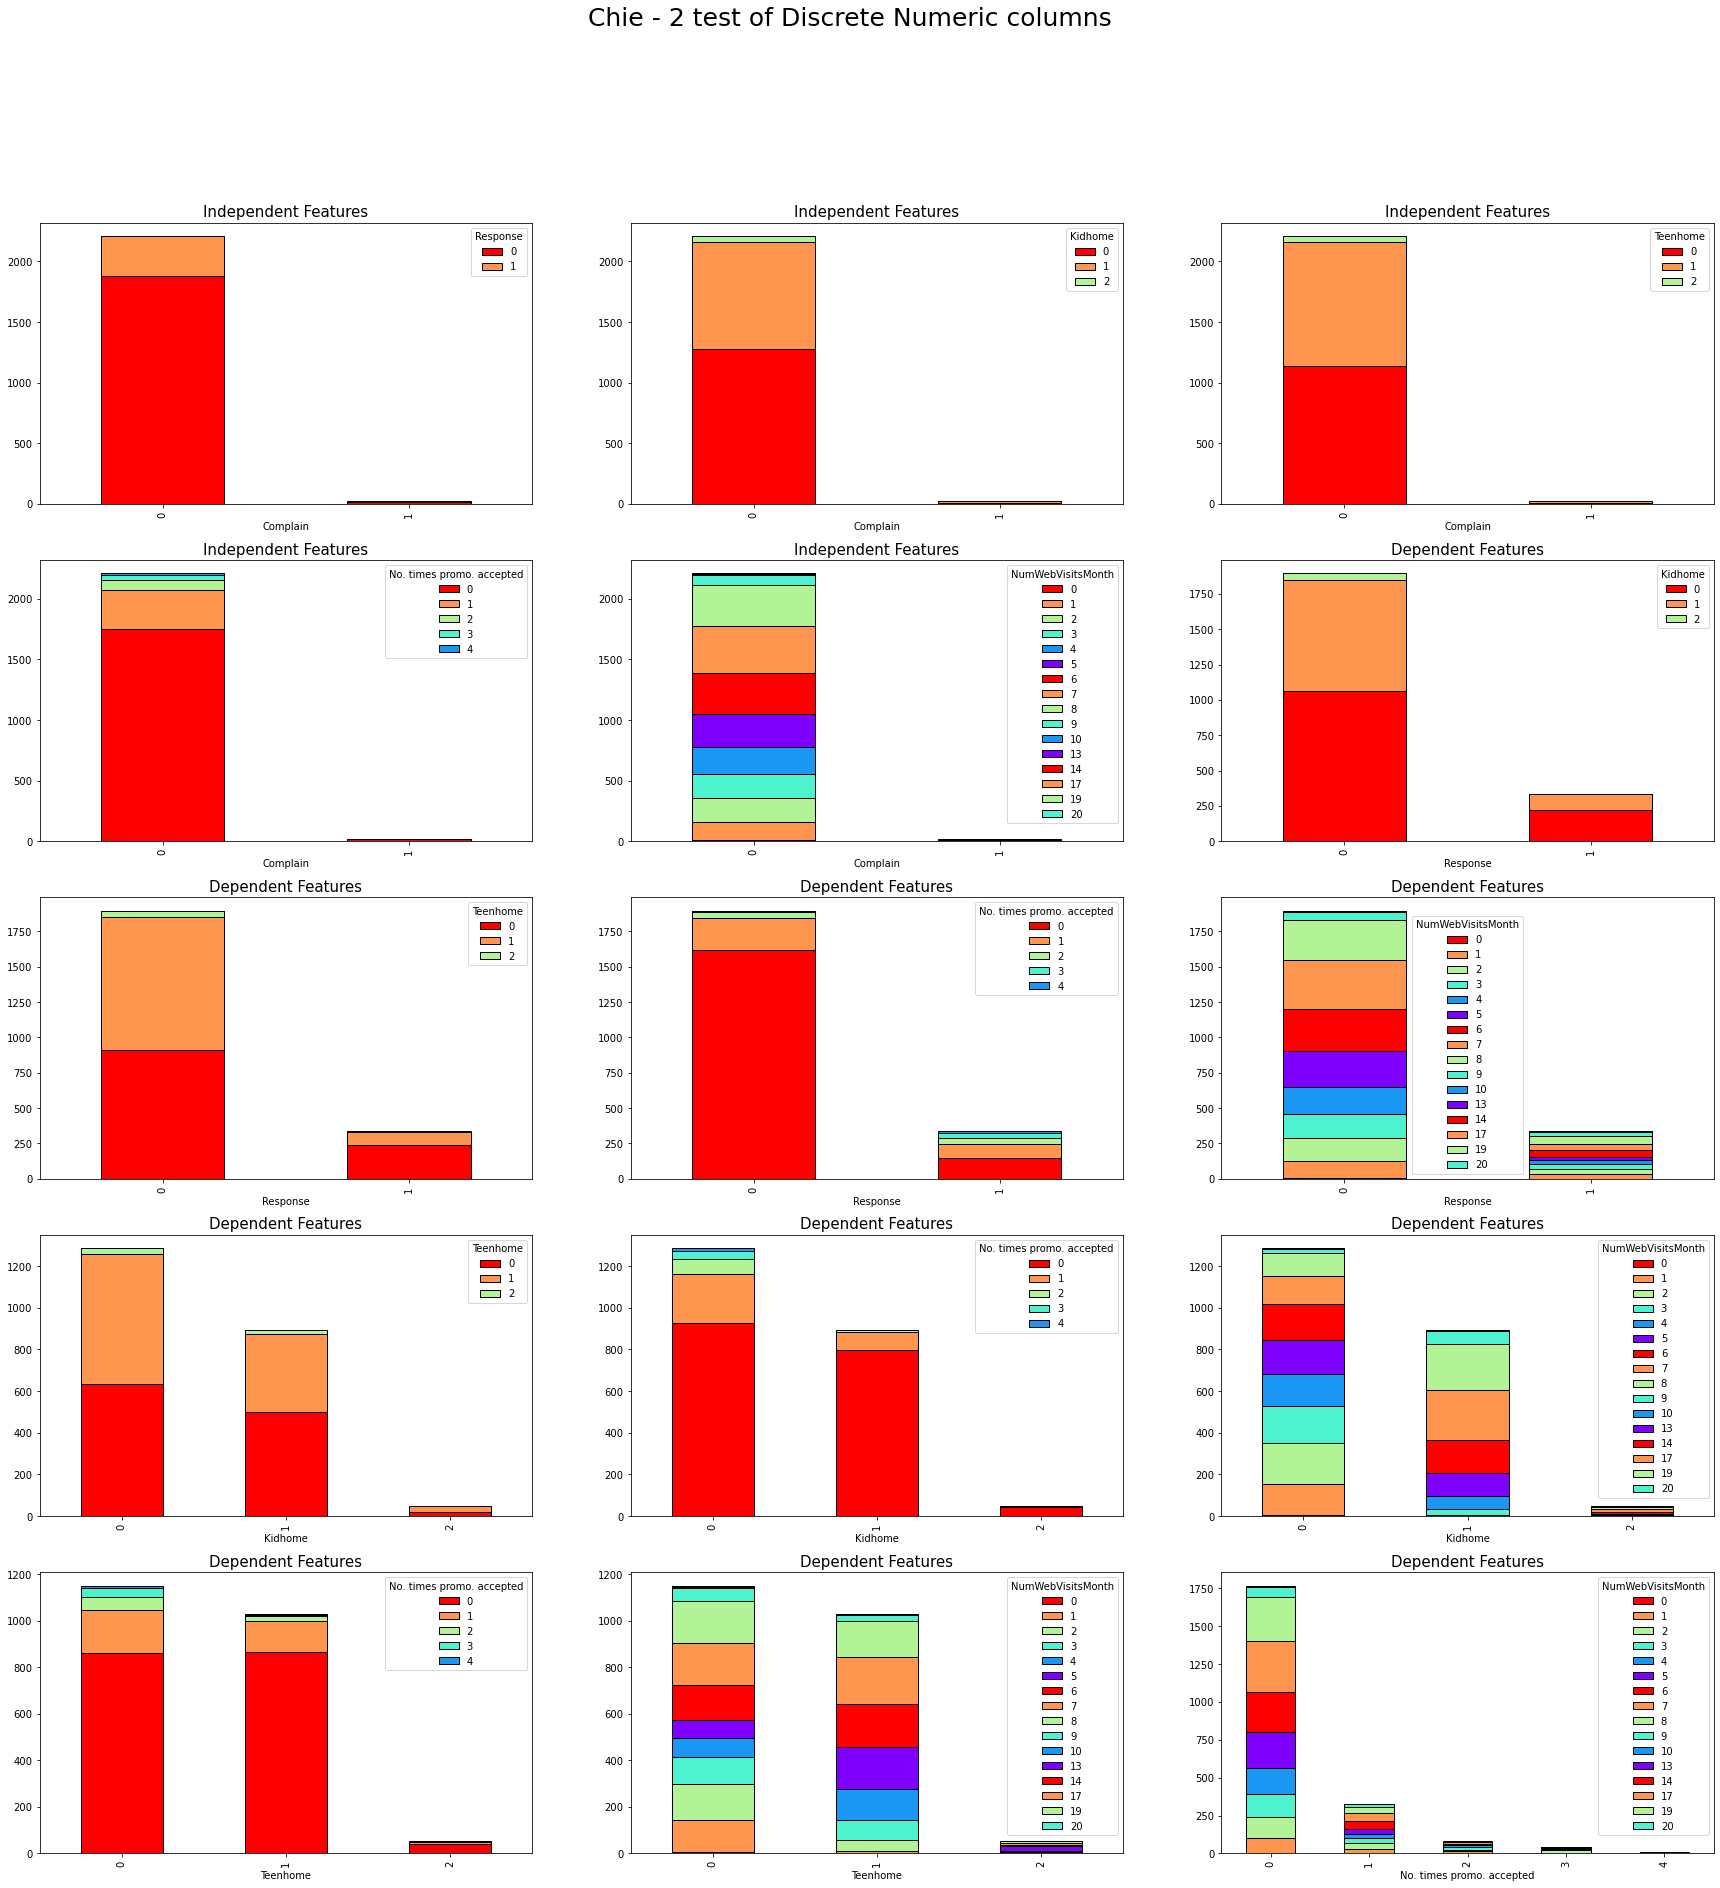

In [33]:
num_cat_cols = ['Complain', 'Response' ,'Kidhome', 'Teenhome', 'No. times promo. accepted', 'NumWebVisitsMonth']
p_dict = {}
n=0
tn = (len(num_cat_cols)*(len(num_cat_cols)-1)/2)+1
_,axs = plt.subplots(int(tn//3+1)-1, 3, figsize=(30,30))
plt.subplots_adjust(hspace=0.2)
for i, col in enumerate(num_cat_cols):
    for j in range(i+1, len(num_cat_cols)):
        if col != num_cat_cols[j]:
            p, re = plot_chi_test(col, num_cat_cols[j], axs[n//3, n%3])
            p_dict[(col, num_cat_cols[j])] = p
            axs[n//3, n%3].set_title(re + ' Features', fontsize=15)
            n+=1
plt.suptitle('Chie - 2 test of Discrete Numeric columns', fontsize=25)

In [34]:
{i:eval_p(j) for i,j in p_dict.items() if eval_p(j) == 'Dependent'}

{('Response', 'Kidhome'): 'Dependent',
 ('Response', 'Teenhome'): 'Dependent',
 ('Response', 'No. times promo. accepted'): 'Dependent',
 ('Response', 'NumWebVisitsMonth'): 'Dependent',
 ('Kidhome', 'Teenhome'): 'Dependent',
 ('Kidhome', 'No. times promo. accepted'): 'Dependent',
 ('Kidhome', 'NumWebVisitsMonth'): 'Dependent',
 ('Teenhome', 'No. times promo. accepted'): 'Dependent',
 ('Teenhome', 'NumWebVisitsMonth'): 'Dependent',
 ('No. times promo. accepted', 'NumWebVisitsMonth'): 'Dependent'}

## Feature Engineering

In [35]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0


### Generating New Features

In [36]:
# Age at 2022
data['Age'] = 2022 - data['Year_Birth']

data['Age_Group'] = pd.cut(x=data['Age'], bins=[25, 40, 55, 70, 90], labels=[0,1,2,3]).astype('int16')

from datetime import timedelta
data['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
data['Months from Joining'] = ((data['Dt_Customer'] - data['Dt_Customer'].min())//timedelta(days=30))

data['No. times promo. accepted'] = data[promotion_cols[1:-1]].sum(axis=1)

data['kids'] = data['Kidhome'] + data['Teenhome']

data['Eating Purchase'] = data[['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)

data['Online Purchase'] = data[['NumWebPurchases', 'NumCatalogPurchases']].sum(axis=1)

data['Months_from_lastPurchase'] = data['Recency']//30

data['Other Purchase'] = data[['MntWines', 'MntGoldProds']].sum(axis=1)
data['spent'] = data[['Other Purchase', 'Online Purchase']].sum(axis=1)

l=(data['spent']/data['Income']).sort_values()

label=[]
for i,j in enumerate([len(i) for i in np.array_split(range(data.shape[0]), 3)]):
    label+=[i]*j

data['SpentPerIncomeCategory'] = pd.Series(label, index=l.index)

data.drop(columns=['MntFruits', 'Recency', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases', 'MntWines', 'MntGoldProds'], inplace=True)
data.drop(columns=['Age', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2'], inplace=True)

In [37]:
data.head()

,Education,Marital_Status,Income,NumDealsPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age_Group,Months from Joining,No. times promo. accepted,kids,Eating Purchase,Online Purchase,Months_from_lastPurchase,Other Purchase,spent,SpentPerIncomeCategory
0,Graduation,Single,58138.0,3,4,7,0,1,2,1,0,0,894,18,1,723,741,2
1,Graduation,Single,46344.0,2,2,5,0,0,2,19,0,2,10,2,1,17,19,0
2,Graduation,Together,71613.0,1,10,4,0,0,2,12,0,0,308,10,0,468,478,1
3,Graduation,Together,26646.0,2,4,6,0,0,0,18,0,1,37,2,0,16,18,0
4,PhD,Married,58293.0,5,6,5,0,0,1,17,0,1,234,8,3,188,196,1


### Encoding

<b>Education Encoding</b>
> <b>0 </b> : If Education is less than Graduation <br>
<b>1 </b> : If Education is Graduation<br>
<b>2 </b> : If Education is higher than Graduation<br>
<br>

<b> Marital Status Encoding</b>
> <b>0 </b> : Single <br>
<b>1 </b> : Together<br>
<b>2 </b> : Married<br>
<b>3 </b> : Divorced <br>
<b>4 </b> : Widow<br>
<b>5 </b> : Alone, Absurd and YOLO<br>

In [38]:
data['Education'] = data['Education'].map({'Basic':0, '2n Cycle':0, 'Graduation':1, 'Master':2, 'PhD':2})

data['Marital_Status'] = data['Marital_Status'].map({j:i if i < 5 else 5 for i,j in enumerate(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'])})

In [39]:
data.head()

,Education,Marital_Status,Income,NumDealsPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age_Group,Months from Joining,No. times promo. accepted,kids,Eating Purchase,Online Purchase,Months_from_lastPurchase,Other Purchase,spent,SpentPerIncomeCategory
0,1,0,58138.0,3,4,7,0,1,2,1,0,0,894,18,1,723,741,2
1,1,0,46344.0,2,2,5,0,0,2,19,0,2,10,2,1,17,19,0
2,1,1,71613.0,1,10,4,0,0,2,12,0,0,308,10,0,468,478,1
3,1,1,26646.0,2,4,6,0,0,0,18,0,1,37,2,0,16,18,0
4,2,2,58293.0,5,6,5,0,0,1,17,0,1,234,8,3,188,196,1


In [40]:
data.columns 

Index(['Education', 'Marital_Status', 'Income', 'NumDealsPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response',
       'Age_Group', 'Months from Joining', 'No. times promo. accepted', 'kids',
       'Eating Purchase', 'Online Purchase', 'Months_from_lastPurchase',
       'Other Purchase', 'spent', 'SpentPerIncomeCategory'],
      dtype='object')

In [41]:
df=data.copy()

### Scaling data

In [42]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
scaled_df = s.fit_transform(data.values)
data = pd.DataFrame(scaled_df, index=data.index, columns=data.columns) 

### PCA(Principle Component Analysis)

Reduce dimensions of data for finding better clustures.

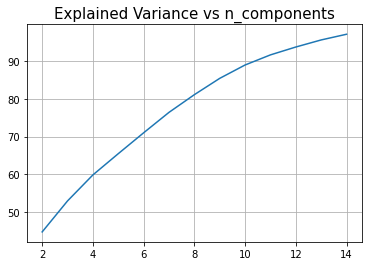

In [43]:
from sklearn.decomposition import PCA
Explained_var = []

for n in range(2,15):
    pca = PCA(n_components=n)
    pca.fit(data)
    var = pca.explained_variance_ratio_
    Explained_var.append(sum(var)*100)
    
sns.lineplot(x=list(range(2,15)), y=Explained_var)
plt.title('Explained Variance vs n_components', fontdict={'fontsize':15})
plt.grid(True)

### Finding number of clustures

In [44]:
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering, KMeans

2


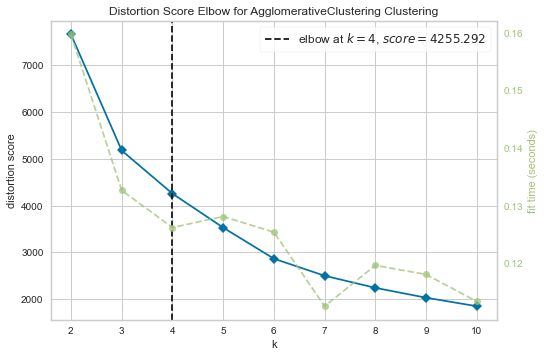

3


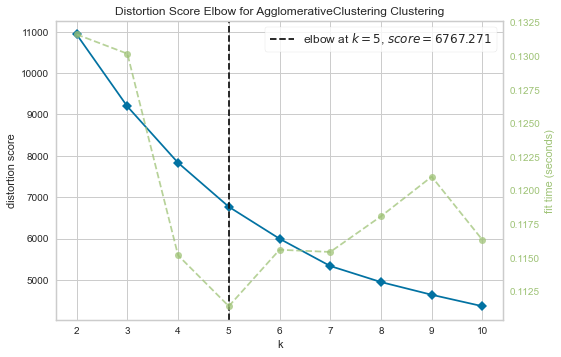

4


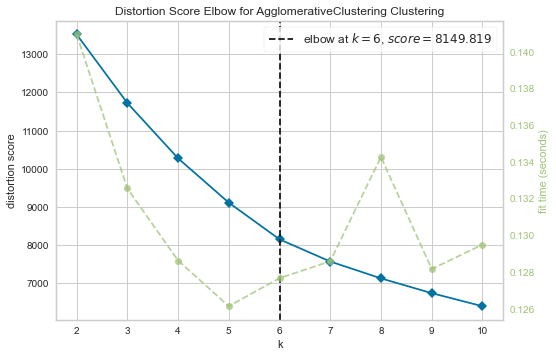

5


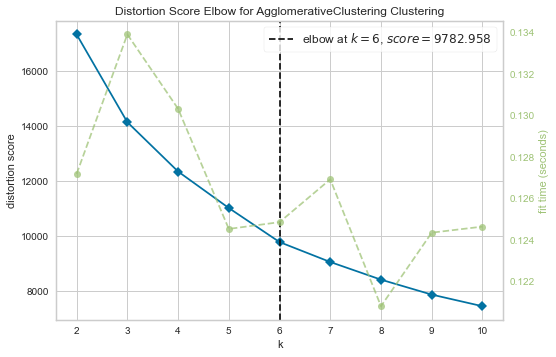

6


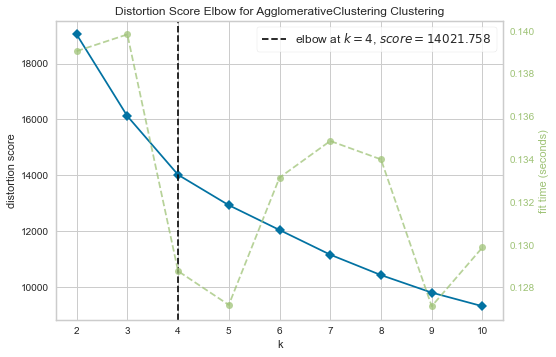

7


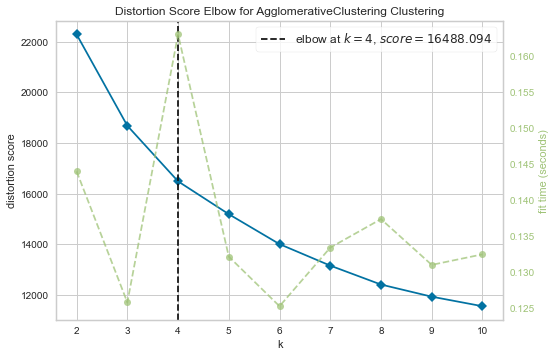

8


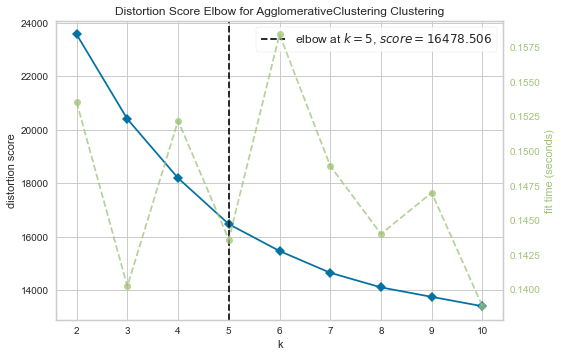

9


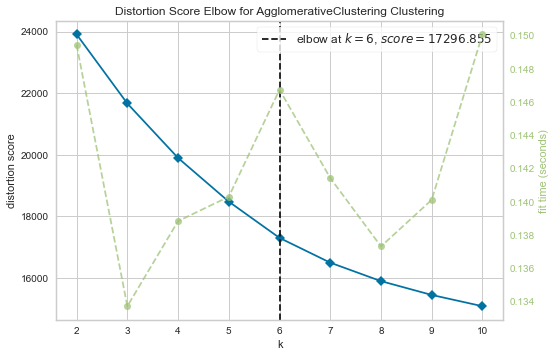

In [45]:
for n in range(2,10):
    print('PCA Components : ',n)
    pca = PCA(n_components=n)
    pca_ = pca.fit_transform(data)
    pca_data = pd.DataFrame(pca_, columns=['c'+str(i) for i in range(1,n+1)]) 
    Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=10)
    a=Elbow_M.fit(pca_data)
    Elbow_M.show()

we n_components 7 and we have 4 clustures but last clusture contain very small data point so lets go with 3 clustures.

In [58]:
pca = PCA(n_components=7)
pca_ = pca.fit_transform(data)

AC = AgglomerativeClustering(n_clusters=3)
label = AC.fit_predict(pca_)

In [59]:
df['label'] = label

F:\jupyter_server_app\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

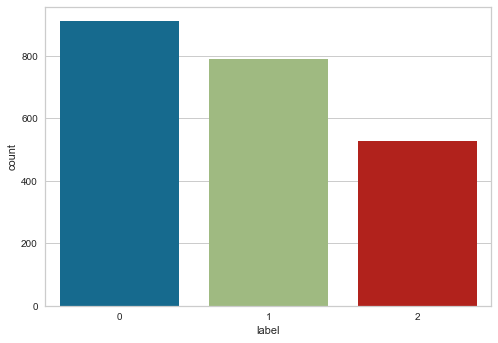

In [60]:
sns.countplot(df['label'])

In [61]:
import warnings
warnings.filterwarnings("ignore")

Months_from_lastPurchase


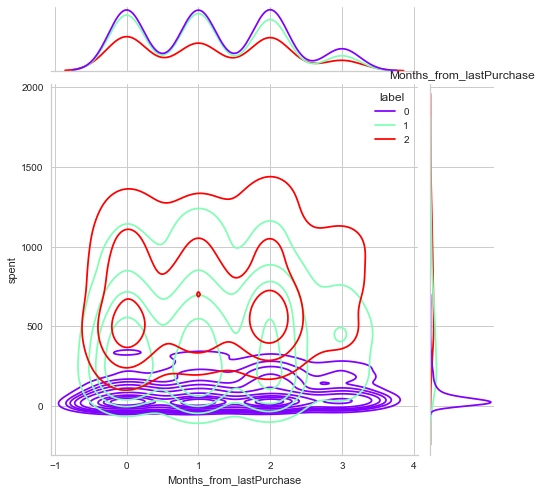

Education


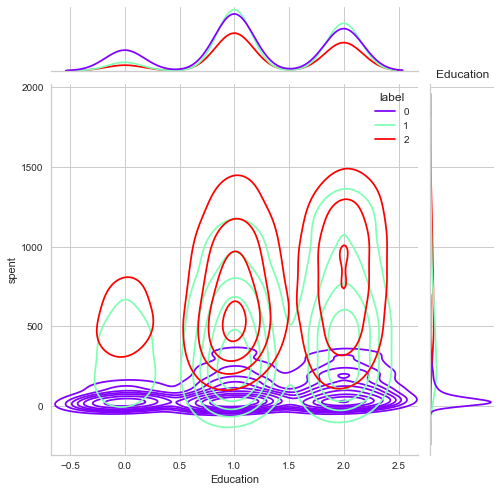

NumStorePurchases


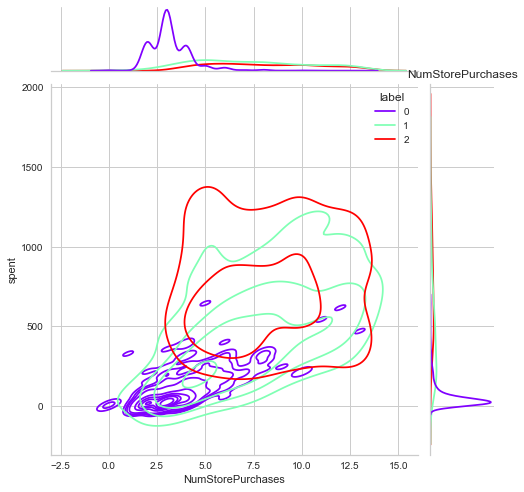

NumDealsPurchases


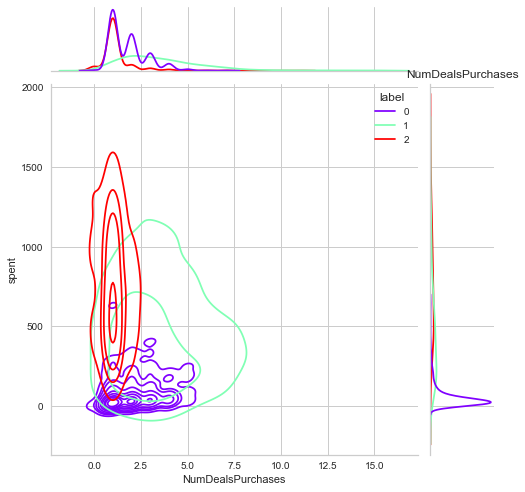

Marital_Status


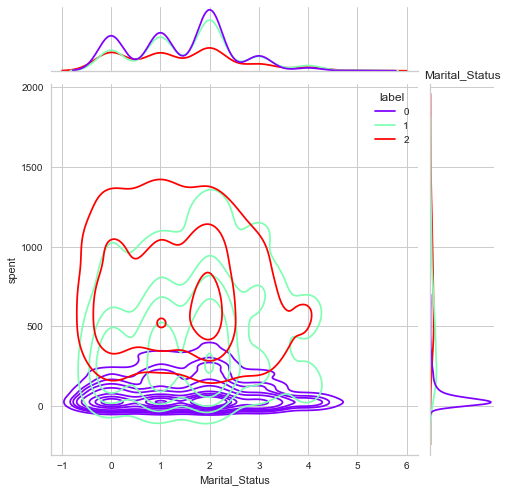

kids


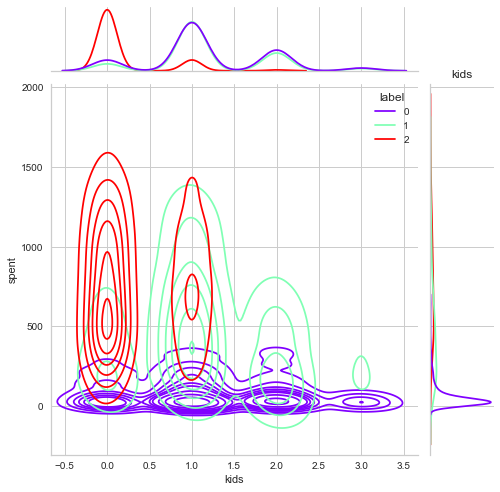

SpentPerIncomeCategory


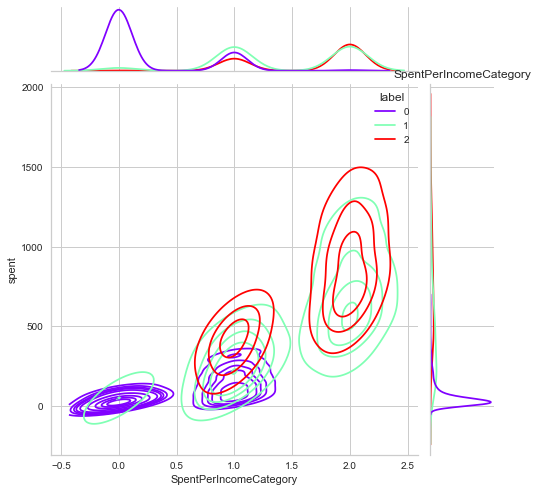

No. times promo. accepted


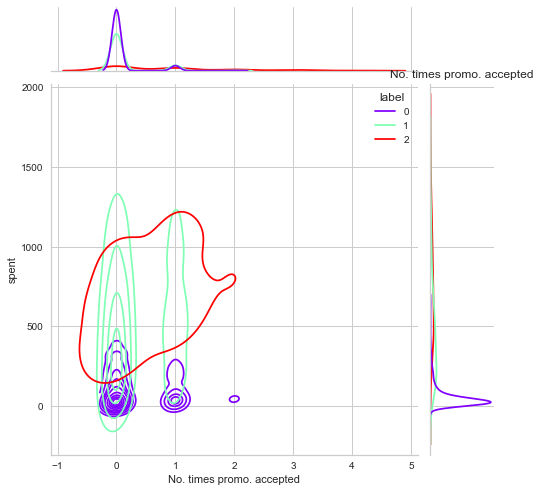

NumWebVisitsMonth


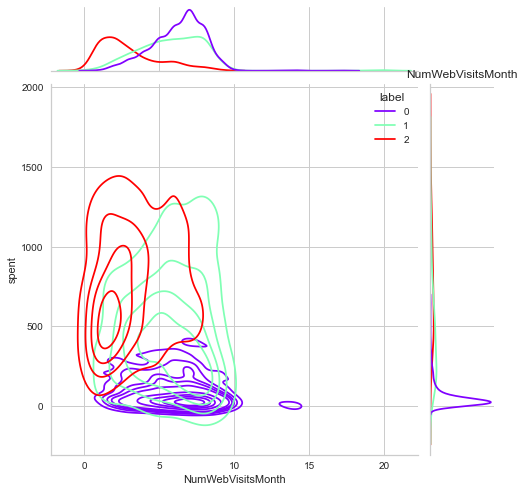

Online Purchase


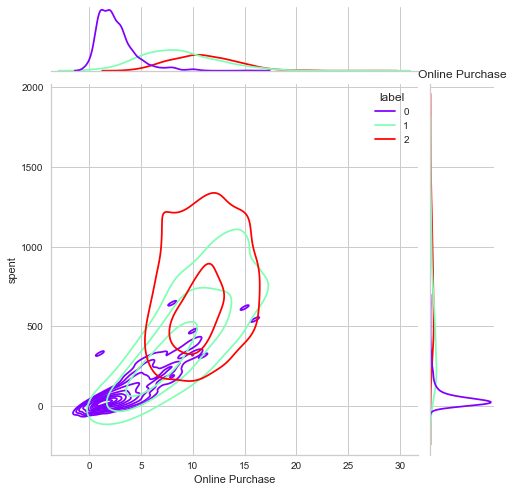

Months from Joining


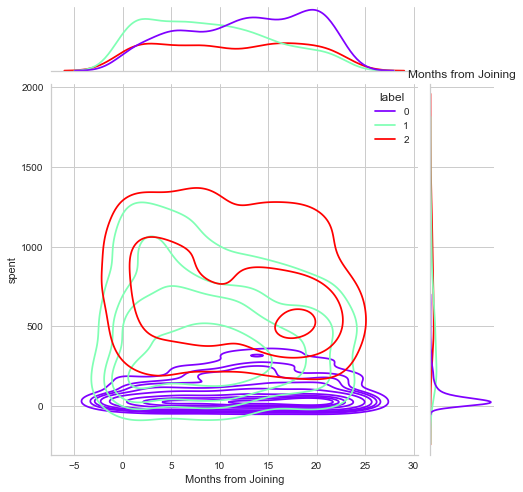

Response


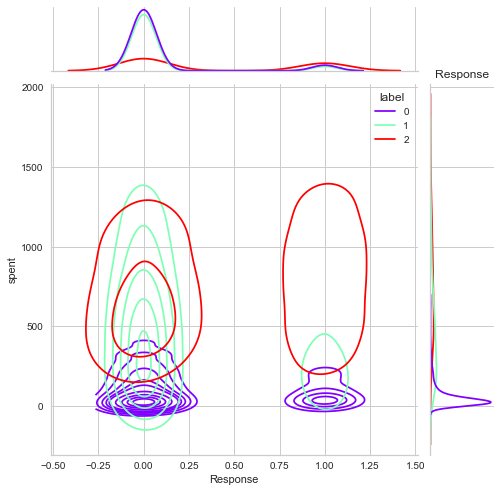

Age_Group


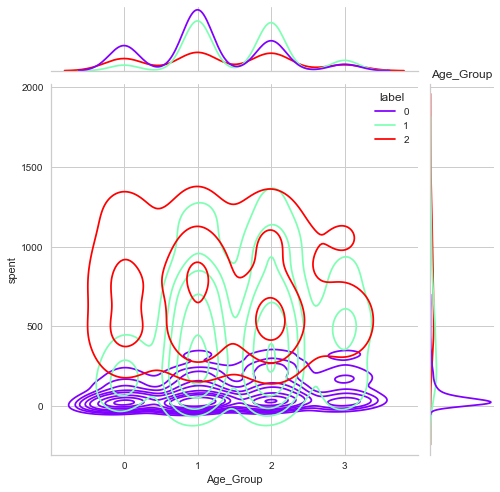

Other Purchase


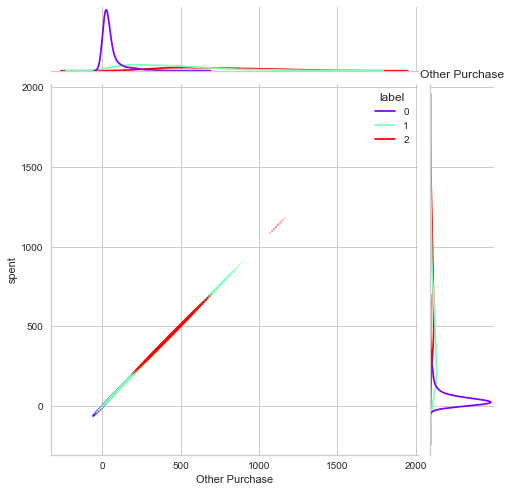

Income


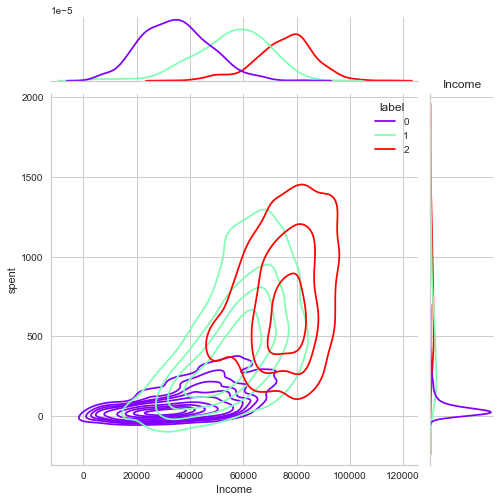

Eating Purchase


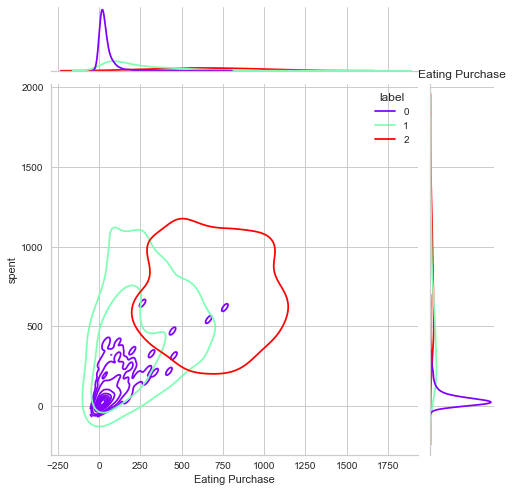

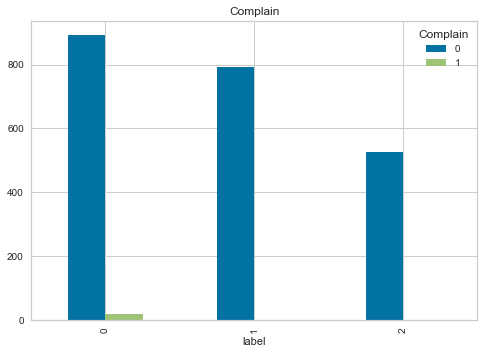

In [63]:
for c in set(df.columns)- set(['label', 'Complain']):
    if c!='spent':
        print(c)
        try:
            sns.jointplot(data = df, x=df[c], y=df["spent"], hue=df["label"], kind='kde', palette=colist.gen_color('rainbow', 3), height=7, aspect=11.7/10)
            plt.title(c)
            plt.savefig(f'C:/Images/{c}.jpg', dpi=400)
            plt.show()
      
        except:
            pass
            
            
df.groupby(['label', 'Complain']).size().unstack().plot(kind='bar')
plt.title('Complain')
plt.savefig('C:/Images/Complain.jpg', dpi=400)
plt.show()
         

## Clusture Details

#### Clusture 0:
>high web visit <br>
less purchase<br>
contain old customer<br>
less income<br>
not acceptted last promotion<br>
mostly education is graduation or below.<br>

#### Clusture 1:
>high web visit<br>
contain new customers<br>
not acceptted last promotion<br>
have kids<br>
mostly education is graduation or above.<br>

#### Clusture 2:
>low web visit<br>
high online purchase<br>
high income compare to other<br>
spent per income is high<br>
mostly have no kids<br>
mostly education is graduation or above.<br>
